In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('intervention.csv')
data=pd.DataFrame(data=data)
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,no,5,4,2,1,2,5,10,yes
6,GP,M,16,U,LE3,T,2,2,other,other,...,yes,no,4,4,4,1,1,3,0,yes
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,no,no,4,1,4,1,1,1,6,no
8,GP,M,15,U,LE3,A,3,2,services,other,...,yes,no,4,2,2,1,1,1,0,yes
9,GP,M,15,U,GT3,T,3,4,other,other,...,yes,no,5,5,1,1,1,5,0,yes


In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [4]:
data.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,yes
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,yes,no,3,2,3,3,3,5,5,no


In [5]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
passed        object
dtype: object

In [6]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [7]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [8]:
data['passed'].unique()

array(['no', 'yes'], dtype=object)

In [9]:
data.shape

(395, 31)

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])
 
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,0,0,3,1,0,0,4,4,0,4,...,0,0,3,2,3,0,0,2,6,0
1,0,0,2,1,0,1,1,1,0,2,...,1,0,4,2,2,0,0,2,4,0
2,0,0,0,1,1,1,1,1,0,2,...,1,0,3,2,1,1,2,2,10,1
3,0,0,0,1,0,1,4,2,1,3,...,1,1,2,1,1,0,0,4,2,1
4,0,0,1,1,0,1,3,3,2,2,...,0,0,3,2,1,0,1,4,4,1


In [11]:
data.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.473418,1.696203,0.777215,0.288608,0.896203,2.749367,2.521519,2.169620,2.281013,...,0.832911,0.334177,2.944304,2.235443,2.108861,0.481013,1.291139,2.554430,5.427848,0.670886
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,1.227473,0.863542,...,0.373528,0.472300,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,6.450651,0.470487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,0.000000,3.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,1.000000,0.000000,3.000000,2.000000,2.000000,0.000000,1.000000,3.000000,4.000000,1.000000
75%,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,...,1.000000,1.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,8.000000,1.000000
max,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,33.000000,1.000000


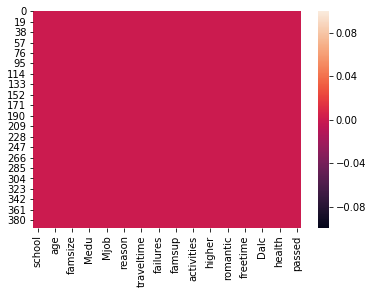

In [12]:
sns.heatmap(data.isnull())

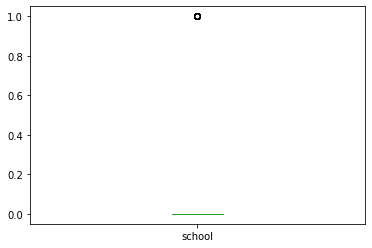

In [13]:
data['school'].plot.box()

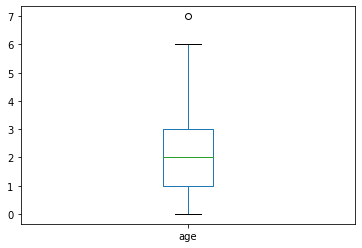

In [14]:
data['age'].plot.box()

In [15]:
x = data.iloc[:,0:31]
y = data.iloc[:, -1]

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=scaler.fit_transform(x)
x

array([[-0.3630498 , -0.94817639,  1.02304645, ..., -0.39928949,
         0.08880926, -1.42774701],
       [-0.3630498 , -0.94817639,  0.23837976, ..., -0.39928949,
        -0.22163018, -1.42774701],
       [-0.3630498 , -0.94817639, -1.33095364, ..., -0.39928949,
         0.70968814,  0.7004042 ],
       ...,
       [ 2.75444305,  1.05465609,  3.37704655, ..., -0.39928949,
        -0.3768499 , -1.42774701],
       [ 2.75444305,  1.05465609,  1.02304645, ...,  1.04106985,
        -0.84250906,  0.7004042 ],
       [ 2.75444305,  1.05465609,  1.80771315, ...,  1.04106985,
        -0.06641046, -1.42774701]])

In [17]:
x.shape

(395, 31)

In [18]:
y.shape

(395,)

In [28]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.33,random_state=4)

In [29]:
train_x.shape

(264, 31)

In [30]:
test_x.shape

(131, 31)

In [31]:
train_y.shape

(264,)

In [32]:
test_y.shape

(131,)

In [33]:
lg=LogisticRegression()

In [34]:
lg.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
pred=lg.predict(test_x)
print(pred)

[1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1
 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0]


In [36]:
print("accuracy score:",accuracy_score(pred,test_y))

accuracy score: 1.0


In [37]:
print(confusion_matrix(test_y,pred))

[[52  0]
 [ 0 79]]


In [38]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        79

    accuracy                           1.00       131
   macro avg       1.00      1.00      1.00       131
weighted avg       1.00      1.00      1.00       131



In [39]:
gnb=GaussianNB()
gnb.fit(train_x,train_y)
predgnb=gnb.predict(test_x)
print(accuracy_score(test_y,predgnb))
print(confusion_matrix(test_y,predgnb))
print(classification_report(test_y,predgnb))

1.0
[[52  0]
 [ 0 79]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        79

    accuracy                           1.00       131
   macro avg       1.00      1.00      1.00       131
weighted avg       1.00      1.00      1.00       131



In [40]:
svc=SVC(kernel='rbf')
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
predsvc=svc.predict(test_x)
print(accuracy_score(test_y,predgnb))
print(confusion_matrix(test_y,predgnb))
print(classification_report(test_y,predgnb))

1.0
[[52  0]
 [ 0 79]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        79

    accuracy                           1.00       131
   macro avg       1.00      1.00      1.00       131
weighted avg       1.00      1.00      1.00       131



In [41]:
dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
preddtc=dtc.predict(test_x)
print(accuracy_score(test_y,preddtc))
print(confusion_matrix(test_y,preddtc))
print(classification_report(test_y,preddtc))

1.0
[[52  0]
 [ 0 79]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        79

    accuracy                           1.00       131
   macro avg       1.00      1.00      1.00       131
weighted avg       1.00      1.00      1.00       131



In [42]:
dtc=KNeighborsClassifier()
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
preddtc=dtc.predict(test_x)
print(accuracy_score(test_y,preddtc))
print(confusion_matrix(test_y,preddtc))
print(classification_report(test_y,preddtc))

0.8473282442748091
[[34 18]
 [ 2 77]]
              precision    recall  f1-score   support

           0       0.94      0.65      0.77        52
           1       0.81      0.97      0.89        79

    accuracy                           0.85       131
   macro avg       0.88      0.81      0.83       131
weighted avg       0.86      0.85      0.84       131



In [43]:
y_pred_prob=lg.predict_proba(test_x)[:,1]
y_pred_prob

array([0.98631598, 0.99283499, 0.98982939, 0.00728953, 0.98118784,
       0.01016849, 0.98187427, 0.98984667, 0.02475292, 0.99220203,
       0.01288338, 0.01949403, 0.98937552, 0.02994222, 0.01120276,
       0.98339561, 0.00741072, 0.98645466, 0.98657172, 0.01823846,
       0.99075597, 0.02118955, 0.98709955, 0.98787553, 0.02100328,
       0.99073752, 0.0111067 , 0.98503419, 0.02837412, 0.01848428,
       0.00666981, 0.98699104, 0.98355214, 0.96800962, 0.98724207,
       0.02708046, 0.97961512, 0.991837  , 0.98438888, 0.98823389,
       0.9842038 , 0.01239747, 0.00838409, 0.97930011, 0.99028146,
       0.98468346, 0.98522213, 0.97506263, 0.99174663, 0.98298259,
       0.98698415, 0.97232457, 0.97623028, 0.9798106 , 0.02436592,
       0.97869194, 0.98745085, 0.90308465, 0.00881727, 0.01125016,
       0.02122213, 0.98835056, 0.00600973, 0.98161076, 0.00730721,
       0.01722207, 0.98190401, 0.98382083, 0.98628852, 0.98669321,
       0.01259217, 0.0164162 , 0.00755354, 0.98256334, 0.00845

In [44]:
fpr,tpr,thresholds=roc_curve(test_y,y_pred_prob)

In [45]:
fpr

array([0., 0., 0., 1.])

In [46]:
tpr

array([0.        , 0.01265823, 1.        , 1.        ])

In [47]:
thresholds

array([1.99283499, 0.99283499, 0.90308465, 0.00410612])

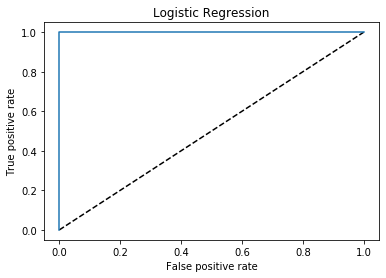

In [48]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

In [49]:
from sklearn.metrics import roc_auc_score


In [50]:
auc_score=roc_auc_score(test_y,lg.predict(test_x))


In [51]:
print(auc_score)

1.0


In [52]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [53]:
rfr.score(train_x,train_y)

1.0

In [54]:
rfr=RandomForestRegressor(n_estimators=100,random_state=46)
rfr.fit(train_x,train_y)
rfr.score(train_x,train_y)

1.0

In [55]:
rfr=RandomForestRegressor(n_estimators=400,random_state=56)
rfr.fit(train_x,train_y)
rfr.score(train_x,train_y)

1.0

In [56]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(train_x,train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [57]:
gbr=GradientBoostingRegressor(n_estimators=100,random_state=46)
gbr.fit(train_x,train_y)
gbr.score(train_x,train_y)

0.9999996073990722

In [58]:
gbr=GradientBoostingRegressor(n_estimators=500,random_state=76)
gbr.fit(train_x,train_y)
gbr.score(train_x,train_y)

0.9999996073990722